## Covid Dataset

### Dataset Introduction
The data set contains daily reports of Covid-19 cases and deaths in countries worldwide. The data also shows the country’s population and the number of cases per 100,000 people on a rolling 14 day average.

Visit <https://corgis-edu.github.io/corgis/csv/covid/?\> to get more information of this dataset.
### Column Names
|Key	| List of... |	Comment|	Example Value|
|:-----|:----------|:----------|:-----------|
Date.Day|	Integer|	The day of the month for this report | 31 |
Date.Month| 	Integer|	The month of the year for this report	|12
Date.Year|	Integer|	The year of this report	|2019
Data.Cases|	Integer	|Number of new cases reported	|0
Data.Deaths|	Integer|	Number of new deaths reported	|0
Location.Country|	String|	Name of country for this report (e.g., "United_States_of_America")	|"Afghanistan"
Location.Code|	String|	Three letter country code (e.g., :USA")	|"AFG"
Data.Population|	Integer|	Population of the country in 2019	|38041757
Location.Continent|	String|	Continent of country (e.g., "Asia", "Europe", "America")	|"Asia"
Data.Rate|	Float|	Cumulative number of cases reported for 14 days per 100000 people	|0.0

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/covid.csv")
df.describe()

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Data.Population,Data.Rate
count,53629.000000,53629.000000,53629.000000,53629.000000,53629.000000,5.362900e+04,53629.000000
mean,15.845009,6.406776,2019.998751,898.374033,22.873035,4.164579e+07,44.382863
std,8.940220,2.600373,0.035324,5019.868017,124.259355,1.548019e+08,113.147610
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,-1.000000e+00,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.269203
50%,16.000000,7.000000,2020.000000,13.000000,0.000000,7.813207e+06,4.652782
75%,24.000000,9.000000,2020.000000,206.000000,3.000000,2.860872e+07,34.905448
max,31.000000,12.000000,2020.000000,102507.000000,4928.000000,1.433784e+09,1900.836210


For there are negative values in Cases, Deaths and Rate which are abnormal, and there's no description in the documentation about these negative values, I removed these values. 

In [3]:
df[df['Data.Population']==-1]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
12,31,12,2019,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
79,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
146,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
213,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
280,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,-1,Other,0.0
...,...,...,...,...,...,...,...,...,...,...
52738,1,11,2020,0,0,Wallis_and_Futuna,NaN,-1,Oceania,0.0
52950,2,11,2020,0,0,Wallis_and_Futuna,NaN,-1,Oceania,0.0
53162,3,11,2020,0,0,Wallis_and_Futuna,NaN,-1,Oceania,0.0
53374,4,11,2020,0,0,Wallis_and_Futuna,NaN,-1,Oceania,0.0


In [4]:
df.drop(df[df['Data.Population']<=0].index, inplace=True)

In [5]:
df[df['Data.Deaths']<0]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
19236,25,5,2020,-372,-1918,Spain,ESP,46937060,Europe,16.255812
25634,25,6,2020,577,-31,Italy,ITA,60359546,Europe,6.042126
27677,5,7,2020,121,-1,Czechia,CZE,10649800,Europe,18.704577
27886,6,7,2020,75,-3,Czechia,CZE,10649800,Europe,18.939323
34419,6,8,2020,218,-12,Kosovo,XKX,1798506,Europe,178.259066
35746,12,8,2020,3172,-2,Spain,ESP,46937060,Europe,100.438758
38183,24,8,2020,237,-443,Kyrgyzstan,KGZ,6415851,Asia,45.964284
46531,3,10,2020,466,-5,Ireland,IRL,4904240,Europe,97.711368


In [6]:
df.drop(df[df['Data.Deaths']<0].index, inplace=True)

In [7]:
df[df['Data.Cases']<0]

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
11768,19,4,2020,-713,410,Spain,ESP,46937060,Europe,116.157680
13758,29,4,2020,-105,3,Lithuania,LTU,2794184,Europe,9.806083
14625,3,5,2020,-161,16,Portugal,PRT,10276617,Europe,53.568212
15361,7,5,2020,-2461,49,Ecuador,ECU,17373657,America,106.885960
15777,9,5,2020,-1480,50,Ecuador,ECU,17373657,America,101.504249
16298,11,5,2020,-9,0,San_Marino,SMR,34453,Europe,261.225438
16401,12,5,2020,-50,18,Ecuador,ECU,17373657,America,36.083365
18033,20,5,2020,-209,0,Benin,BEN,11801151,Africa,0.288107
18416,21,5,2020,-115,0,Uganda,UGA,44269587,Africa,0.106168
20924,2,6,2020,-1,0,Uganda,UGA,44269587,Africa,0.445001


In [8]:
df.drop(df[df['Data.Cases']<0].index, inplace=True)

The dataset contains much information about the pandemic. In the pre-processing of the data, I found both the mode and median number of this dataset are 0, which indicates there are predominantly 0 in the dataset. This is because the dataset records the information about the pandemic from the beginning of 2019, while the pandemic began from the begining of 2020 and developed into a global pandemic several months after. Therefore, I narrowed my time and space scope and focused on the Covid-19 circumstance in France in September, 2020. 

In [93]:
y_2020 = df[df['Date.Year']==2020]

In [28]:
m_9 = y_2020[y_2020['Date.Month']==9]

In [29]:
France = m_9[m_9['Location.Country']=='France'].sort_values(by="Data.Cases", ignore_index=True).copy()

In [30]:
France['Data.Cases']

0      3082
1      4070
2      4203
3      4298
4      4982
5      6158
6      6544
7      7017
8      7071
9      7157
10     7183
11     7852
12     8051
13     8550
14     8577
15     8975
16     9406
17     9784
18     9843
19    10008
20    10561
21    10593
22    11123
23    11569
24    13072
25    13215
26    13498
27    14412
28    15797
29    16096
Name: Data.Cases, dtype: int64

In [31]:
COL1 = France['Data.Cases']
COL1.mean()

9091.566666666668

In [32]:
COL1.median()

8776.0

In [33]:
COL1.mode()

0      3082
1      4070
2      4203
3      4298
4      4982
5      6158
6      6544
7      7017
8      7071
9      7157
10     7183
11     7852
12     8051
13     8550
14     8577
15     8975
16     9406
17     9784
18     9843
19    10008
20    10561
21    10593
22    11123
23    11569
24    13072
25    13215
26    13498
27    14412
28    15797
29    16096
Name: Data.Cases, dtype: int64

In [35]:
COL1.loc[int(0.1*30):int(0.9*30)].mean()

9179.96

In [94]:
COL1.quantile(0.25)

7030.5

In [95]:
COL1.quantile(0.75)

10990.5

The trimmed mean is calculated with a narrowed scope of data, namely with the 10% values at the beginning and the end of the sorted column dropped. 

Text(11000, 3.5, '75% quantile:10990.5')

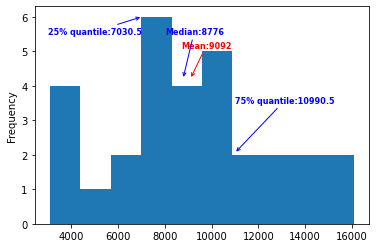

In [108]:
fig,ax = plt.subplots()
COL1.plot(kind='hist')
plt.annotate('Mean:9092', xy=(9091.6, 4.2), xytext=(8700, 5.1),
            weight='bold', color='red',fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='red'))
plt.annotate('Median:8776', xy=(8776.0, 4.2), xytext=(8000, 5.5),
            weight='bold', color='blue',fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='blue'))
plt.annotate('25% quantile:7030.5', xy=(7030.5, 6), xytext=(3000, 5.5),
            weight='bold', color='blue',fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='blue'))
plt.annotate('75% quantile:10990.5', xy=(10990.5, 2.05), xytext=(11000, 3.5),
            weight='bold', color='blue',fontsize=8,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='blue'))

As shown in the graph, the median value of this column is on the left side of its mean value, and because all values in the column are mode values, the mode values of this column aren't significant and thus shouldn't be displayed on the graph. The trimmed mean value is on the right side of the mean value. It shows the first 10% of values are more intensive than the last 10% values.

In [44]:
COL1.mad()

2779.6711111111113

In [43]:
COL1.std()

3476.0778599602377

In [45]:
COL1.quantile(0.75)-COL1.quantile(0.25)

3960.0

The mean absolute deviation is the smallest among these three values, and the interquartile value the largest.
These three values all describe the level of intensiveness of the data. The first value reflect the mean difference of all values from the mean value is 2779.7, and the second value implies the square root of the variance of these values is 3476.1. Though the graph doesn't directly represent these two values, we can thus sense the distributing pattern of these values. The interquartile value shows the difference of 75% and 25% quantile,  which can be displayed on the graph. 

<AxesSubplot:>

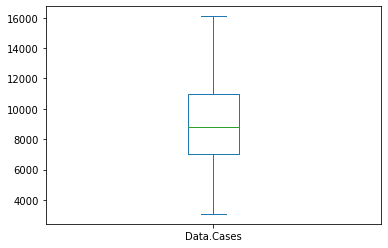

In [46]:
COL1.plot(kind='box')

As shown in the boxplot, the calculated median is represented in the middle of the box by a green line, and the two quantile values(25% quantile and 75% quantile) are separately the bottom and the top line of the box.

In [60]:
for i in range(30):
    if COL1.iloc[i] < 0.5*COL1.mean():
        France.loc[i,'COL1_mean_split']= 0
    elif 0.5*COL1.mean() <= COL1.iloc[i] < COL1.mean():
        France.loc[i,'COL1_mean_split']= 1
    else:
        France.loc[i,'COL1_mean_split']= 2
France['COL1_mean_split'] = France['COL1_mean_split'].astype(int)

<AxesSubplot:xlabel='COL1_mean_split'>

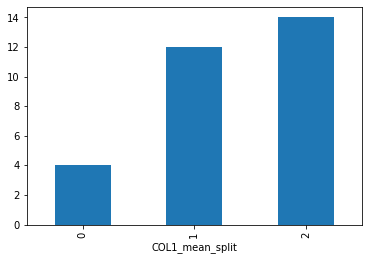

In [61]:
France.groupby('COL1_mean_split')['Data.Deaths'].count().plot(kind='bar')

<AxesSubplot:title={'center':'Data.Deaths'}, xlabel='COL1_mean_split'>

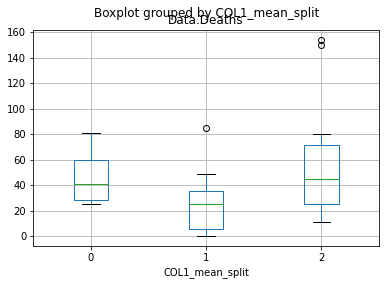

In [64]:
France.boxplot(column=['Data.Deaths'], by='COL1_mean_split')

In [65]:
COL3 = France['Data.Cases']

In [70]:
France[['Data.Cases','Data.Deaths']].corr()

,Data.Cases,Data.Deaths
Data.Cases,1.000000,0.344461
Data.Deaths,0.344461,1.000000


<AxesSubplot:xlabel='Data.Cases', ylabel='Data.Deaths'>

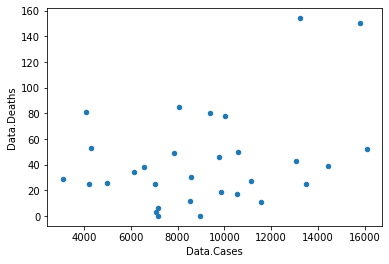

In [71]:
France.plot(kind='scatter',
        x='Data.Cases',
        y='Data.Deaths')

The scatter plot shows there are little correlation between these two columns, which corresponds to the calculated correlation value (The closer the correlation value is to 0, the less strongly the two values are correlated)

<AxesSubplot:xlabel='Data.Cases', ylabel='Data.Deaths'>

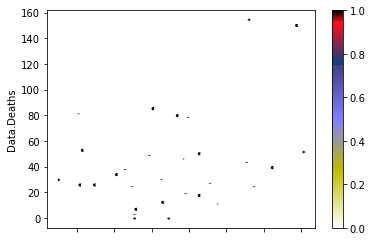

In [72]:
France.plot(kind='hexbin', cmap='gist_stern_r',
        x='Data.Cases',
        y='Data.Deaths')

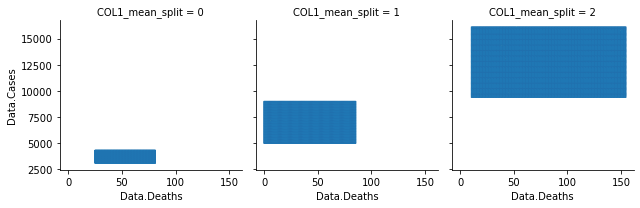

In [121]:
g = sns.FacetGrid(France, col="COL1_mean_split")
g = g.map(plt.hexbin, "Data.Deaths","Data.Cases")

A hexagonal binning plot of COL1 and COL3 grouped into different facet. But I'm confused why this hexbin looks so different from the one shown above. I tried plotting a scatter plot with seaborn, and I got the below graph.

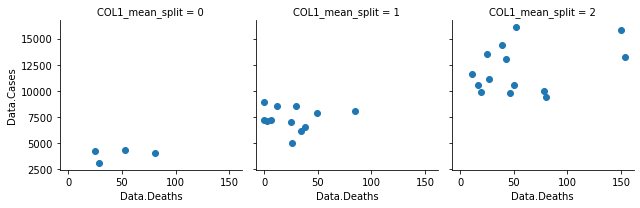

In [122]:
g = sns.FacetGrid(France, col="COL1_mean_split")
g = g.map(plt.scatter, "Data.Deaths","Data.Cases")

This looks normal. But I'm still puzzled about which step was I wrong in producing the hexagonal binning plot.